# Comparing Dictionary Structures

## Hypothesis
I think a hash table will be twice as efficient as a balanced binary tree when testing a multimap and unordered multimap in c++

## Methods
The code for this problem can be found in this [github repo](). All files must be placed in the same local directory to run. The C++ is compiled using ```g++ dicts.cpp``` and ran with ```a.exe 3```, where the 1 argument to *a.exe* is the maximum number of seconds you want to wait for one data structure to insert N elements.

Running the below python script calls the c++ program using python's os library. The C++ and Python code can be run in 2 distinct steps by commenting out the call to os.system and compiling/running the C++ using bash or powershell. The execution time when running the below cell is ~12-13 seconds with a runtime argument ofn *3*.

The Python script below will print a plot of the data file. Uncommenting the *os.system* calls will compile and run the C++ code with the specified arguments. Since the output file dicts.csv if provided in this repo, these lines default to being commented.

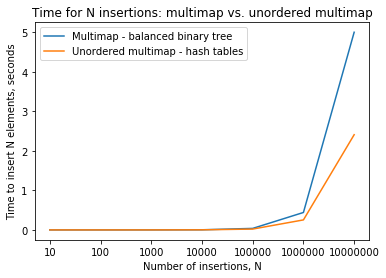

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import os

# os.system('g++ dicts.cpp')
# os.system('a.exe 3')

with open('dicts.csv') as csvfile:
    reader = csv.reader(csvfile)
    x, mm, umm = [], [], []
    for row in reader:
        # print(row)
        x.append(row[0])
        mm.append(float(row[1])/1000000)
        umm.append(float(row[2])/1000000)
    plt.plot(x, mm, label = 'Multimap - balanced binary tree')
    plt.plot(x, umm, label = 'Unordered multimap - hash tables')
    plt.legend()
    plt.xlabel('Number of insertions, N')
    plt.ylabel('Time to insert N elements, seconds')
    plt.title('Time for N insertions: multimap vs. unordered multimap')
    plt.show()

## Results
The results of execution appear in the graph generated by the python code above. Subsequent runs of the program produced similar results, so the timings appear to be relatively stable. The data shows that the 3 second limit is surpassed by a multimap with 10,000,000 insertions, so that is that last value of N plotted. The below table is a screenshot grabbed from a run of ```a.exe```, where each element in each row represents the number of insertions, multimap time, and unordered multimap time.

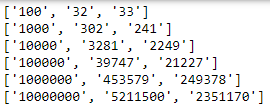

The C++ script returns the number of microseconds the program takes to return, so the python script takes this into account by converting to seconds when making the plot. It appears that the execution time increases exponentially with each power of 10 increase for the number of insertions, which actually means that time complexity increases linearly for more insertions. 

## Discussion
I was not suprised that the two maps performed similarly for small number of insertions and that the difference became more pronounced. My hypothesis was startingly correct, especially as the number of insertions reached 100,000. One this that I found suprising was how long an insertion takes in a dictionary. I always assumed that all dictionaries used hash tables and worked relatively instantly, but this problem shows that even hash tables have a small degree of overhead when done thousands of times in quick succession. 

## Conclusion
An unordered multimap inserts elements in less time than a multimap, with the difference being far more noticeable for large values of N.